In [368]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt

In [4]:
#RAW FOLDER - Shark Attack
shark_csv_folder = pd.read_csv("INPUT/GSAF5.csv",encoding='latin1')
shark_csv_folder.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [5]:
#RAW FOLDER - Description
shark_csv_folder.describe()

,Year,original order
count,5992.000000,5992.000000
mean,1925.204606,2997.548899
std,286.473712,1729.860210
min,0.000000,2.000000
25%,1942.000000,1499.750000
50%,1975.000000,2997.500000
75%,2003.000000,4495.250000
max,2016.000000,5993.000000


In [6]:
shark_csv_folder.shape

(5992, 24)

In [8]:
#RAW FOLDER - Shark Attack (OUTPUT FOLDER)
shark_output = pd.read_csv("OUTPUT/GSAF5.csv",encoding='latin1')
shark_output.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [10]:
#Removing two last columns. They did not have relevant information for our purpose.
shark_output=shark_output.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [12]:
#Comparing the amendments. The columns were removed.
print(shark_csv_folder.shape)
print(shark_output.shape)

(5992, 24)
(5992, 22)


In [13]:
#Checking what is the type of the columns in order to know how can we work on them.
shark_output.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
dtype: object

In [24]:
#Removing whitespaces from header.
shark_output.rename(columns=lambda x: x.strip())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [26]:
#Checking if the white spaces have been removed from header. 
shark_output.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [25]:
#Removing white spaces from Country Column.
shark_output['Country']=shark_output['Country'].str.strip()

In [23]:
#Removing ? from Country Column.
shark_output['Country']=shark_output['Country'].str.replace("?",'')

In [27]:
#Removing the empty cells. 
shark_output=shark_output.fillna(0)
display(shark_output)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,0,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,0,0,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,0,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,0,0,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,0,Pearl diving,Ahmun,M,...,Y,0,0,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,0,0,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,0,"Panama Bay 8ºN, 79ºW",0,Jules Patterson,M,...,Y,0,0,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [90]:
#Re-naming all the names that are nok in Country Column.

dicc1={'NEW BRITAIN':'PAPUA NEW GUINEA', 
      'ENGLAND':'UNITED KINGDOM', 
      'SCOTLAND':'UNITED KINGDOM',
      'WESTERN SAMOA':'SAMOA',
      'ST. MAARTIN':'SAINT MARTIN', 
      'ST. MARTIN':'SAINT MARTIN',
      'ST. HELENA':'SAINT HELENA',
      'ST HELENA':'SAINT HELENA'
     }




shark_output['Country']=shark_output['Country'].str.replace('NEW BRITAIN','PAPUA NEW GUINEA')
shark_output['Country']=shark_output['Country'].str.replace('ENGLAND','UNITED KINGDOM')
shark_output['Country']=shark_output['Country'].str.replace('SCOTLAND','UNITED KINGDOM')
shark_output['Country']=shark_output['Country'].str.replace('WESTERN SAMOA','SAMOA')
shark_output['Country']=shark_output['Country'].str.replace('ST. MAARTIN','SAINT MARTIN')
shark_output['Country']=shark_output['Country'].str.replace('ST. MARTIN','SAINT MARTIN')
shark_output['Country']=shark_output['Country'].str.replace('ST. HELENA','SAINT HELENA')
shark_output['Country']=shark_output['Country'].str.replace('ST HELENA','SAINT HELENA')


shark_output['Country']=shark_output['Country'].str.replace('BURMA','MYANMAR')
shark_output['Country']=shark_output['Country'].str.replace('Sierra Leone','SIERRA LEONE')
shark_output['Country']=shark_output['Country'].str.replace('NORTHERN MARIAN ISLANDS','MARIANA ISLANDS')
shark_output['Country']=shark_output['Country'].str.replace('FALKLAND ISLANDS','MALDIVES')
shark_output['Country']=shark_output['Country'].str.replace('MALDIVE ISLANDS','MALDIVES')
shark_output['Country']=shark_output['Country'].str.replace('OKINAWA','JAPAN')
shark_output['Country']=shark_output['Country'].str.replace('CRETE','GREECE')
shark_output['Country']=shark_output['Country'].str.replace('Fiji','FIJI')
shark_output['Country']=shark_output['Country'].str.replace('TAIWAN','CHINA')
shark_output['Country']=shark_output['Country'].str.replace('GRAND CAYMAN','CAYMAN ISLANDS')
shark_output['Country']=shark_output['Country'].str.replace('CAPE VERDE','CABO VERDE')
shark_output['Country']=shark_output['Country'].str.replace('Seychelles','SHEYCHELLES')


shark_output.Country=shark_output.Country.str.replace(r"(.*)?SEA(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?OCEAN(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?/(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?GULF(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?BAY(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?TERRITORIES(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"ASIA",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?Coast(.*)?",'OUT OF SCOPE')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?Between(.*)?",'OUT OF SCOPE')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?BALNKA(.*)?",'OUT OF SCOPE')


shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?SRI LANKA(.*)?",'SRI LANKA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?UAE(.*)?",'UNITED ARAB EMIRATES')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?ANDAMAN(.*)?",'INDIA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)? GUINEA(.*)?",'PAPUA NEW GUINEA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?MICRONESIA(.*)?",'MICRONESIA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?RUSSIA(.*)?",'RUSSIA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?SYRIAN(.*)?",'SYRIAN ARAB REPUBLIC')

In [80]:
shark_output["Country"].value_counts()

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     153
NEW ZEALAND          125
                    ... 
MONACO                 1
NEVIS                  1
DIEGO GARCIA           1
DJIBOUTI               1
GABON                  1
Name: Country, Length: 142, dtype: int64

In [84]:
#Checking what are the remaining null values.
a=shark_output.isnull().sum()[shark_output.isnull().sum()>0]
a

Country    43
dtype: int64

In [87]:
#Removing the remaining null values.
shark={'Country':'OUT OF SCOPE'}
shark_output.fillna(value=shark,inplace=True)

In [88]:
a=shark_output.isnull().sum()[shark_output.isnull().sum()>0]
a

Series([], dtype: int64)

In [92]:
#Cleaning Year Column.
for e in shark_output.Year:
    if e <1300:
        shark_output.Year=shark_output.Year.replace(e, 'OUT OF SCOPE')

In [96]:
#Removing white spaces from Year Column.
shark_output["Year"] = shark_output["Year"].astype(str)
shark_output['Year']= shark_output['Year'].str.strip()

In [108]:
shark_output[["Year","Country"]]["Year"].value_counts()

2015            139
2011            128
OUT OF SCOPE    127
2014            125
2013            122
               ... 
1755              1
1788              1
1834              1
1841              1
1807              1
Name: Year, Length: 229, dtype: int64

In [ ]:
shark_output.to_csv('OUTPUT/v1_GSAF5.csv')

In [304]:
Dev=['NORWAY',
 'SWITZERLAND',
 'IRELAND',
 'GERMANY',
 'HONG KONG',
 'AUSTRALIA',
 'ICELAND',
 'SWEDEN',
 'SINGAPORE',
 'NETHERLANDS',
 'DENMARK',
 'FINLAND',
 'CANADA',
 'NEW ZEALAND',
 'UNITED KINGDOM',
 'UNITED STATES',
 'BELGIUM',
 'LIECHTENSTEIN',
 'JAPAN',
 'AUSTRIA']

,,Year
Year,Country,
1785,UNITED KINGDOM,1
1812,UNITED KINGDOM,1
1845,UNITED KINGDOM,1
1848,UNITED KINGDOM,1
1856,UNITED KINGDOM,1
1864,UNITED KINGDOM,1
1876,UNITED KINGDOM,1
1907,UNITED KINGDOM,1
1921,UNITED KINGDOM,1


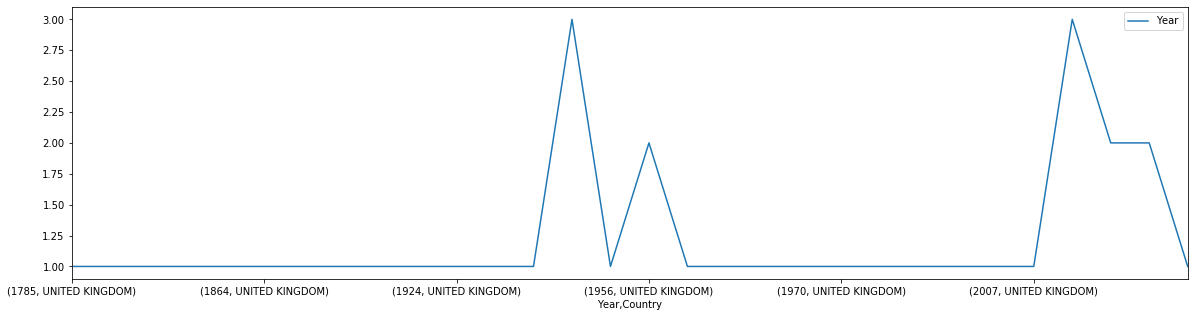

In [356]:
High=shark_output[shark_output['Country'].eq('UNITED KINGDOM')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})

display(gr_df)
gr_df.plot.line(figsize=(20,5));

In [357]:
High=shark_output[shark_output['Country'].eq('IRELAND')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})

display(gr_df)

,,Year
Year,Country,
1917,IRELAND,1


,,Year
Year,Country,
1945,HONG KONG,1
1954,HONG KONG,2
1971,HONG KONG,1
1973,HONG KONG,2
1974,HONG KONG,4
1975,HONG KONG,1
1976,HONG KONG,1
1979,HONG KONG,2
1991,HONG KONG,3


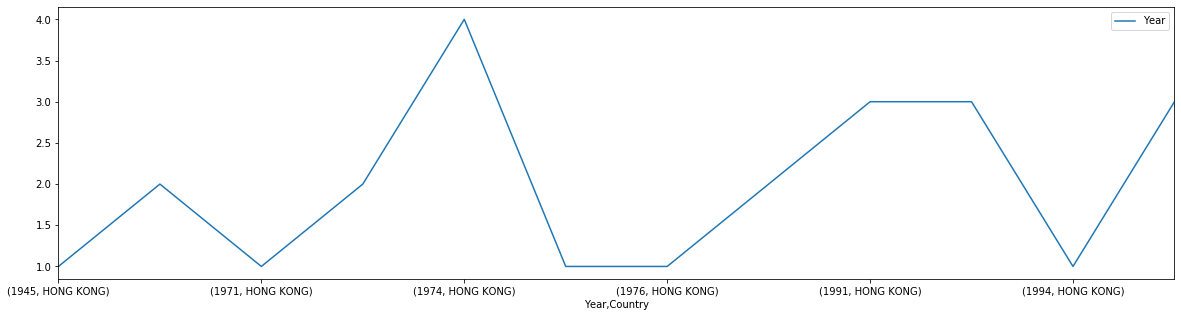

In [355]:
High=shark_output[shark_output['Country'].eq('HONG KONG')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})
gr_df

display(gr_df)
gr_df.plot.line(figsize=(20,5));

,,Year
Year,Country,
1788,AUSTRALIA,1
1791,AUSTRALIA,1
1803,AUSTRALIA,1
1804,AUSTRALIA,1
1807,AUSTRALIA,1
...,...,...
2013,AUSTRALIA,20
2014,AUSTRALIA,29
2015,AUSTRALIA,30


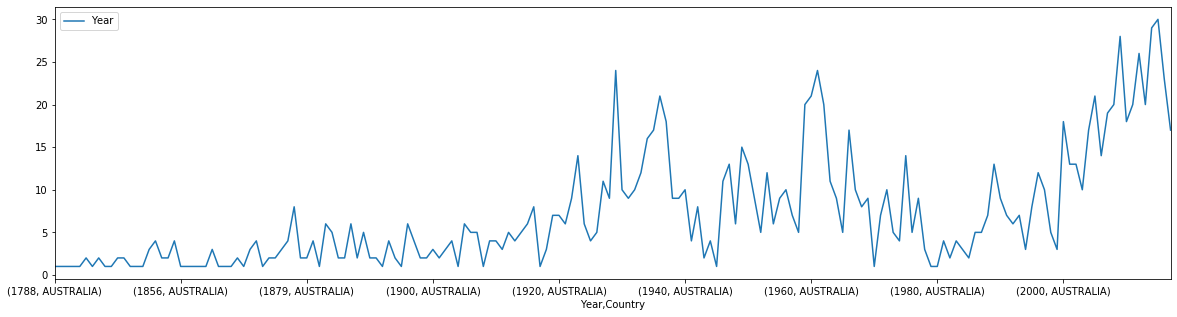

In [354]:
High=shark_output[shark_output['Country'].eq('AUSTRALIA')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})
gr_df

display(gr_df)
gr_df.plot.line(figsize=(20,5));

In [310]:
High=shark_output[shark_output['Country'].eq('ICELAND')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})
gr_df

display(gr_df)

,,Year
Year,Country,
1733,ICELAND,1


In [313]:
High=shark_output[shark_output['Country'].eq('SWEDEN')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})
gr_df

display(gr_df)

,,Year
Year,Country,
1755,SWEDEN,1


,,Year
Year,Country,
1861,SINGAPORE,1
1926,SINGAPORE,1
1950,SINGAPORE,1
1954,SINGAPORE,1
1966,SINGAPORE,1
OUT OF SCOPE,SINGAPORE,1


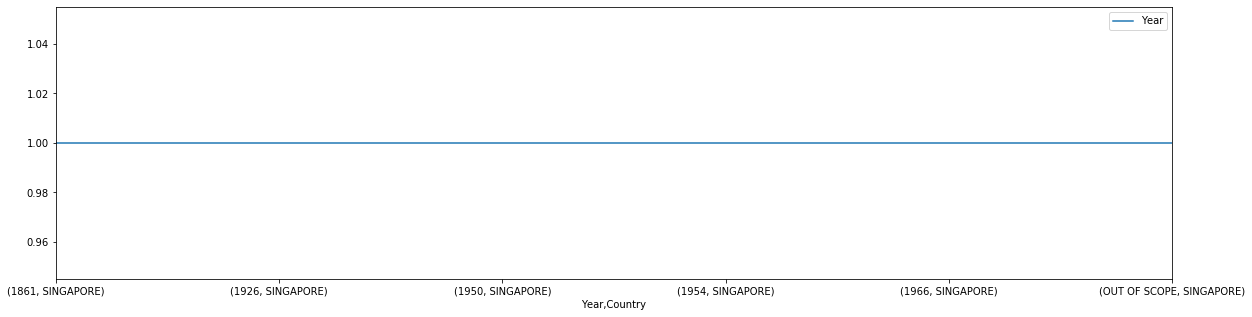

In [353]:
High=shark_output[shark_output['Country'].eq('SINGAPORE')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})
gr_df

display(gr_df)
gr_df.plot.line(figsize=(20,5));

,,Year
Year,Country,
1874,CANADA,1
1888,CANADA,1
1891,CANADA,1
1920,CANADA,1
1925,CANADA,1
1932,CANADA,1
1936,CANADA,1
1953,CANADA,1
2000,CANADA,1


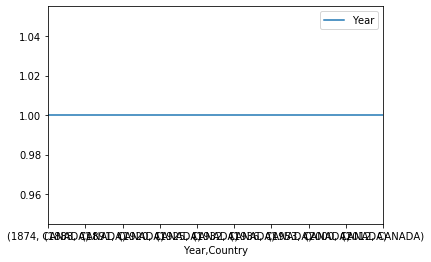

In [328]:
High=shark_output[shark_output['Country'].eq('CANADA')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})

display(gr_df)
gr_df.plot.line()

,,Year
Year,Country,
1874,CANADA,1
1888,CANADA,1
1891,CANADA,1
1920,CANADA,1
1925,CANADA,1
1932,CANADA,1
1936,CANADA,1
1953,CANADA,1
2000,CANADA,1


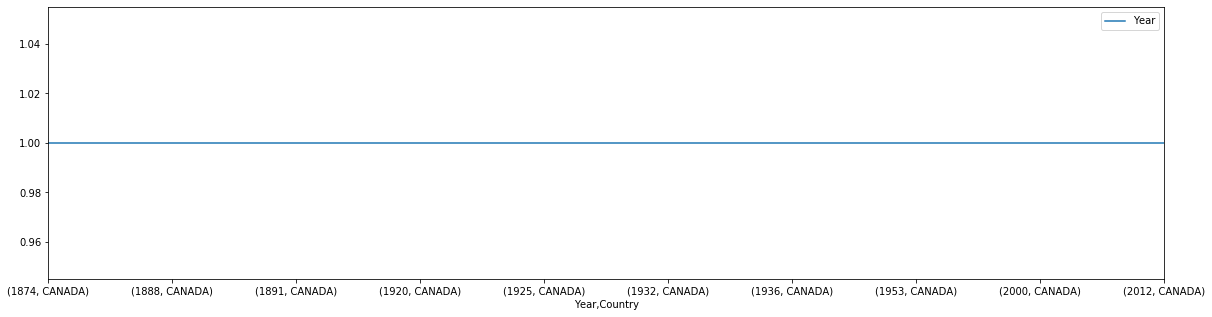

In [352]:
High=shark_output[shark_output['Country'].eq('CANADA')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})

display(gr_df)
gr_df.plot.line(figsize=(20,5));


Year
Year         Country             
1733         ICELAND            1
1755         SWEDEN             1
1785         UNITED KINGDOM     1
1788         AUSTRALIA          1
1791         AUSTRALIA          1
...                           ...
2016         JAPAN              1
             NEW ZEALAND        1
OUT OF SCOPE AUSTRALIA         17
             NEW ZEALAND        1
             SINGAPORE          1

[337 rows x 1 columns]

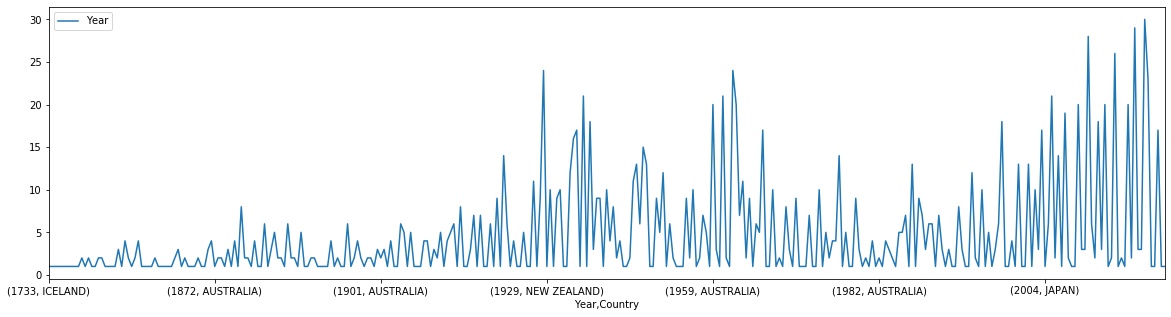

In [376]:
Dev=['NORWAY',
 'SWITZERLAND',
 'IRELAND',
 'GERMANY',
 'HONG KONG',
 'AUSTRALIA',
 'ICELAND',
 'SWEDEN',
 'SINGAPORE',
 'NETHERLANDS',
 'DENMARK',
 'FINLAND',
 'CANADA',
 'NEW ZEALAND',
 'UNITED KINGDOM',
 'UNITED STATES',
 'BELGIUM',
 'LIECHTENSTEIN',
 'JAPAN',
 'AUSTRIA']

shark_output1=shark_output[shark_output.Country.isin(Dev)]
gr_df = shark_output1.groupby(['Year','Country']).agg({"Year":"count"})

display(gr_df)
gr_df.plot.line(figsize=(20,5));